# Um-modelo-de-Machine-Learning-para-Deteccao-de-Fraudes-em-Cartao-de-Credito

## Este trabalho é meu projeto de TCC para o curso de Tecnoligia em Sistemas de Computação

### Introdução

O uso crescente de cartões de crédito em transações financeiras, especialmente online, tem levado a um aumento nas fraudes, resultando em prejuízos significativos para clientes e empresas. Nesse contexto, a ciência de dados oferece uma abordagem promissora para a detecção de fraudes em transações de cartão de crédito. Este trabalho tem como objetivo desenvolver um modelo de detecção de fraudes utilizando dados reais disponibilizados pelo Kaggle, por meio de técnicas de ciência de dados. Será realizada uma análise exploratória dos dados, seguida pelo desenvolvimento e avaliação de diferentes modelos preditivos para aumentar a eficiência e eficácia na detecção de fraudes.

### Etapas do projeto

1. Coleta de dados: coletar os dados reais de transações de cartão de crédito disponibilizados pelo Kaggle. 

2. Análise exploratória de dados: realizar uma análise exploratória dos dados para entender a distribuição das variáveis, verificar valores faltantes, outliers, correlação entre as variáveis, etc. 

3. Pré-processamento de dados: realizar o pré-processamento dos dados, incluindo a limpeza, transformação e seleção de características. 

4. Balanceamento de dados: como os dados estão desbalanceados, aplicar técnicas de balanceamento de dados, como o SMOTE, para criar um conjunto de dados equilibrado. 

5. Seleção de modelo: escolher o modelo de aprendizado de máquina apropriado para o problema de detecção de fraude. 

6. Treinamento e ajuste: dividir os dados em conjuntos de treinamento e teste, treinar o modelo e ajustar. 

7. Avaliação do modelo: avaliar o desempenho do modelo usando métricas de avaliação, como precisão, recall, F1-score. 

8. Interpretação do modelo: interpretar o modelo treinado para entender quais recursos são mais importantes na detecção de fraudes de cartão de crédito. 

9. Conclusão e recomendações: concluir a pesquisa com uma síntese dos resultados obtidos e recomendações para futuros trabalhos na área. 

### Importando as Bibliotecas utéis

Importar bibliotecas em Python é uma etapa essencial em muitos projetos de programação, especialmente na ciência de dados e na análise de dados. Uma biblioteca é um conjunto de módulos ou pacotes de software que contém funções e métodos pré-definidos para realizar tarefas específicas.

- A biblioteca 'os' fornece uma maneira de interagir com o sistema operacional, permitindo que você acesse recursos como diretórios, arquivos e variáveis de ambiente.

- A biblioteca 'pandas' é uma biblioteca de análise de dados que fornece uma estrutura de dados chamada DataFrames, que é útil para trabalhar com conjuntos de dados tabulares. Ela também fornece uma ampla variedade de ferramentas para manipular, analisar e visualizar dados.

- A biblioteca 'seaborn' é uma biblioteca de visualização de dados baseada em matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.

- A biblioteca 'matplotlib' é uma biblioteca de visualização de dados em Python. Ela permite que você crie gráficos em 2D e 3D de alta qualidade, incluindo gráficos de linhas, barras, histogramas e muito mais.

- A partir da biblioteca 'sklearn' (também conhecida como scikit-learn), importamos as classes train_test_split e RandomForestClassifier para construir um modelo de classificação usando o algoritmo Random Forest. O train_test_split é uma função que divide um conjunto de dados em conjuntos de treinamento e teste, permitindo que você avalie o desempenho do modelo em dados não vistos. O RandomForestClassifier é um algoritmo de aprendizado de máquina que usa uma combinação de árvores de decisão para fazer previsões precisas. Dela também importamos a classe confusion_matrix (matriz de confusão), que é um resumo da contagem dos verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos para um modelo de classificação binária.
- 'imblearn' é uma biblioteca Python que contém implementações de diversas técnicas para lidar com desbalanceamento de classes, incluindo o SMOTE.
- Por fim, a biblioteca 'classification_report' da sklearn fornece uma métrica de avaliação para o desempenho do modelo de classificação. Ela retorna várias métricas de desempenho, incluindo precisão, recall, f1-score e suporte, para cada classe no conjunto de dados.

Essas bibliotecas são muito úteis para trabalhar com ciência de dados em Python, e a combinação delas pode ajudá-lo a explorar, visualizar e analisar dados, construir modelos de aprendizado de máquina e avaliar o desempenho do modelo.

In [98]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

Importando o arquivo CSV

O código pd.read_csv("arquivo") faz parte do pacote pandas em Python e é usado para ler arquivos CSV (Comma-Separated Values), que são um formato comum para armazenar dados em tabelas.

In [99]:
dataset= pd.read_csv("creditcard.csv")

Analise Exploratória

dataset.head() é uma função em pandas que exibe as primeiras linhas do objeto DataFrame e é usada para obter uma visão geral rápida dos dados em um DataFrame.

In [100]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


dataset.isna().sum() é um código em Python e pandas que é usado para contar o número de valores ausentes em cada coluna de um objeto DataFrame.

In [101]:
#Buscando valores missing
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

dataset["coluna"].value_counts() é um código que conta o número de ocorrências de cada valor único em uma coluna do objeto DataFrame, enquanto sns.countplot(dataset["coluna"]) é um código que pode ser usado para visualizar a distribuição dos valores em uma coluna usando a biblioteca Seaborn.

C:\Users\Alanf\download\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

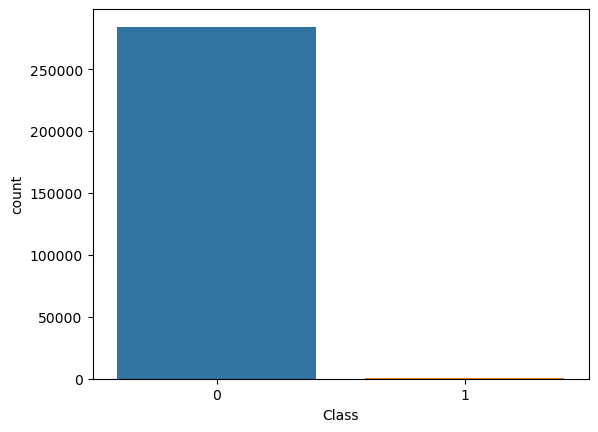

In [102]:
#Dando uma olhadana na variavel Target
dataset["Class"].value_counts()
sns.countplot(#Dando uma olhadana na variavel Target
dataset["Class"])

dataset.corr()["coluna"].sort_values(ascending=False) é um código que calcula a correlação de Pearson entre a variável alvo ("Class") e as outras variáveis numéricas no DataFrame e classifica as correlações em ordem decrescente.

In [103]:
#Correlação
dataset.corr()["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

dataset.describe() é um código que gera um resumo estatístico do DataFrame, incluindo informações como contagem, média, desvio padrão, mínimo, máximo e quartis para cada coluna numérica no DataFrame.

In [104]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Pré processamento dos dados

O pré-processamento de dados em ciência de dados refere-se ao conjunto de etapas necessárias para transformar os dados brutos em dados limpos e organizados que possam ser facilmente analisados ​​e utilizados para treinar modelos de aprendizado de máquina. As etapas típicas incluem:

1. Coleta de dados: aquisição dos dados necessários para a análise.
2. Limpeza de dados: identificação e correção de erros, preenchimento de valores faltantes, remoção de duplicatas e normalização dos dados.
3. Transformação de dados: aplicação de transformações aos dados para torná-los mais úteis para análise, como a padronização ou normalização de variáveis, ou a codificação de variáveis categóricas.
4. Redução de dimensionalidade: redução do número de variáveis em um conjunto de dados, geralmente por meio de técnicas de análise de componentes principais ou seleção de recursos.
5. Separação de dados: divisão do conjunto de dados em conjuntos de treinamento, validação e teste para modelagem e avaliação de desempenho.

O pré-processamento de dados é uma etapa crítica na análise de dados, pois a qualidade dos dados pode afetar significativamente os resultados da análise e dos modelos de aprendizado de máquina. Portanto, é importante investir tempo suficiente na coleta, limpeza e transformação dos dados para garantir que eles sejam confiáveis e úteis.

In [105]:
X = dataset.drop('Class', axis = 1)
y = dataset['Class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 

print('Quantidade de registros para treino: ', x_train.shape[0]) 
print('Quantidade de registros para teste: ',x_test.shape[0])

Quantidade de registros para treino:  199364
Quantidade de registros para teste:  85443


In [106]:
model = RandomForestClassifier()

In [107]:
model = model.fit(x_train,y_train)

In [108]:
y_predict = model.predict(x_test)

In [ ]:
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsões da Maquina': y_predict})
gabarito

In [110]:
print('Métricas de Classificação: \n', classification_report(y_test,y_predict))

Métricas de Classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.82      0.89       141

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



As métricas de classificação apresentadas são muito importantes para avaliar o desempenho do algoritmo de Machine Learning em questão.

- Precision: representa a proporção de verdadeiros positivos (classe 1) em relação ao total de previsões positivas (verdadeiros positivos + falsos positivos). No contexto de detecção de fraudes em cartões de crédito, a precision significa a proporção de transações previstas como fraudulentas que de fato são fraudulentas. No caso apresentado, a precision para a classe 1 é de 0.97, o que é uma boa medida.

- Recall: representa a proporção de verdadeiros positivos em relação ao total de casos positivos (verdadeiros positivos + falsos negativos). No contexto de detecção de fraudes em cartões de crédito, o recall significa a proporção de transações fraudulentas que foram previstas corretamente pelo modelo. No caso apresentado, o recall para a classe 1 é de 0.82, o que indica que o modelo identificou a maioria das transações fraudulentas.

- F1-score: é a média harmônica entre precision e recall. É uma medida balanceada que leva em conta tanto a precision quanto o recall. No caso apresentado, o F1-score para a classe 1 é de 0.89.

- Accuracy: é a proporção de previsões corretas em relação ao total de previsões. No caso apresentado, a accuracy do modelo é de 1.00, o que indica que o modelo acertou todas as previsões.

- Support: representa o número de amostras de cada classe no conjunto de teste. No caso apresentado, há 85.302 amostras da classe 0 e 141 amostras da classe 1.

Porém, todo este trabalho foi realizado num dataset com dados desbalanceado.

Dados desbalanceados são aqueles em que as classes de interesse no conjunto de dados possuem um número muito diferente de amostras. Por exemplo, em um conjunto de dados com duas classes, uma classe pode ter apenas 10% das amostras enquanto a outra tem 90%. Isso pode causar problemas para muitos algoritmos de aprendizado de máquina, uma vez que eles tendem a ser mais eficazes na predição da classe majoritária, já que essa classe tem mais exemplos para aprender.

Alguns exemplos de problemas que podem ocorrer em conjuntos de dados desbalanceados incluem baixa precisão, baixa revocação e viés de predição. Além disso, em casos extremos, os algoritmos podem simplesmente ignorar a classe minoritária completamente, o que pode ser problemático em tarefas críticas como detecção de fraude ou identificação de doenças raras.

Portanto, é importante lidar com dados desbalanceados antes de treinar um modelo de aprendizado de máquina. Uma das técnicas mais comuns é o oversampling (aumento da quantidade de amostras) da classe minoritária, que pode ser feito utilizando técnicas como SMOTE (Synthetic Minority Over-sampling Technique).

In [60]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

<AxesSubplot:xlabel='Class', ylabel='count'>

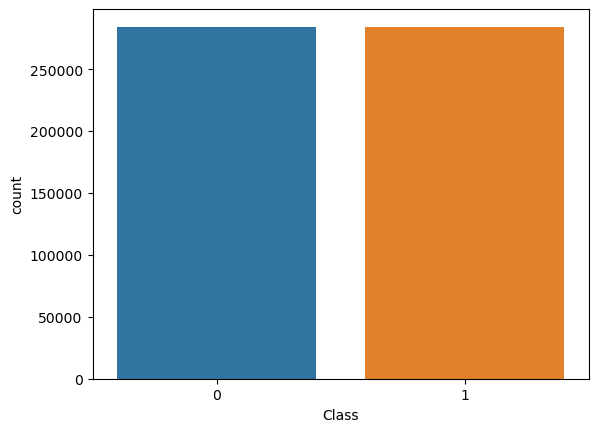

In [61]:
# Criação do novo conjunto de dados balanceado
data_res = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['Class'])], axis=1)

# Visualização da distribuição das classes
sns.countplot(x='Class', data=data_res)

### SELEÇÃO DO MODELO

Neste trabalho, optamos pelo uso do modelo Random Forest Classifier, um algoritmo de classificação baseado em árvores de decisão. Esse modelo cria uma floresta de árvores de decisão e faz previsões com base na maioria das previsões individuais de cada árvore. O Random Forest é amplamente utilizado em problemas de classificação, regressão e detecção de anomalias, sendo capaz de lidar com dados categóricos e numéricos. É uma técnica poderosa de aprendizado de máquina que oferece boa precisão e resistência ao overfitting.
Além disso, abordamos a importância da separação dos dados em conjuntos de treinamento e teste. Essa divisão permite treinar o modelo com os dados de treinamento e avaliar seu desempenho em dados não vistos durante o treinamento. A proporção comum para essa divisão é de 70-30 ou 80-20, onde 70% ou 80% dos dados são usados para treinamento e o restante para teste, garantindo que o modelo generalize bem para novos dados.

In [67]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_res, y_res, test_size=0.3, random_state=10)

print('Quantidade de registros para treino: ', x_train.shape[0]) 
print('Quantidade de registros para teste: ',x_test.shape[0]) #qtd de registros para teste

Quantidade de registros para treino:  199364
Quantidade de registros para teste:  85443


In [68]:
model2 = RandomForestClassifier()
model2.fit(X2_train, y2_train)

RandomForestClassifier()

In [69]:
y_predict2 = model2.predict(X2_test)

A figura abaixo mostra o código para criação de uma tabela para comparação de resultados.
Ele cria um DataFrame chamado "gabarito" que contém duas colunas: "Gabarito" e
"Previsões da Maquina". A coluna "Gabarito" contém os valores verdadeiros da classe (0 ou
1) para as amostras de teste e a coluna "Previsões da Maquina" contém as previsões feitas
pelo modelo para as mesmas amostras de teste. A visualização permite que sejam analisadas
as previsões feitas pelo modelo e comparadas com os valores verdadeiros da classe

In [70]:
gabarito2 = pd.DataFrame({'Gabarito': y2_test, 'Previsões da Maquina': y_predict2})
gabarito

,Gabarito,Previsões da Maquina
168367,0,0
110270,0,0
243562,0,0
74702,0,0
98416,0,0
...,...,...
27285,0,0
135082,0,0
169296,0,0
58125,0,0


## Avaliação do Modelo

A figura abaixo mostra o código e a saída gerada pela função classification_report do scikitlearn para imprimir as métricas de classificação do modelo de machine learning. A função
recebe como parâmetros o conjunto de dados de teste (y_test) e as previsões do modelo
(y_predict), e retorna um relatório com as seguintes métricas de avaliação: precision, recall e
f1-score, para cada classe (no caso de problemas de classificação com mais de uma classe), e
a média ponderada dessas métricas (weighted avg).
Essas métricas são importantes para avaliar o desempenho do modelo em relação à
capacidade de prever corretamente as classes. A precisão mede a proporção de previsões
corretas para uma determinada classe em relação ao total de previsões para essa classe. O
recall mede a proporção de previsões corretas para uma determinada classe em relação ao
total de instâncias daquela classe no conjunto de testes. O f1-score é uma média harmônica
entre precisão e recall, e é uma métrica mais balanceada para problemas desbalanceados. O
relatório impresso com essas métricas é útil para avaliar o desempenho do modelo em cada
classe, identificar classes que possam estar sendo sub ou superestimadas e comparar
diferentes modelos ou configurações de parâmetros

In [71]:
print('Novas Métricas de Classificação: \n', classification_report(y_test,y_predict))

Novas Métricas de Classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85205
           1       1.00      1.00      1.00     85384

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



- A precisão (precision) representa a proporção de observações classificadas como positivas pelo modelo que realmente eram positivas. No caso apresentado, a precisão para a classe 0 (transações normais) foi de 1.00, ou seja, todas as transações classificadas como normais pelo modelo eram realmente normais. Para a classe 1 (fraudes), a precisão também foi de 1.00, indicando que todas as transações classificadas como fraude eram realmente fraudes.

- O recall representa a proporção de observações positivas que foram corretamente identificadas pelo modelo. No caso apresentado, o recall para a classe 0 foi de 1.00, indicando que todas as transações normais foram corretamente identificadas como normais pelo modelo. Para a classe 1, o recall também foi de 1.00, indicando que todas as transações fraudulentas foram corretamente identificadas pelo modelo.

- O F1-score é uma média harmônica entre a precisão e o recall, sendo uma medida que combina ambas as métricas. No caso apresentado, o F1-score foi de 1.00 para ambas as classes, indicando um bom desempenho do modelo na classificação das transações.

- A acurácia (accuracy) representa a proporção de observações que foram corretamente classificadas pelo modelo, considerando ambas as classes. No caso apresentado, a acurácia foi de 1.00, indicando que todas as transações foram corretamente classificadas pelo modelo.

Em resumo, os resultados indicam um bom desempenho do modelo na detecção de fraudes, com alta precisão, recall, F1-score e acurácia.

## Interpretação do modelo

O modelo Random Forest Classifier é capaz de fornecer informações sobre a importância de
cada recurso (variável) na classificação das transações como fraude ou não fraude. Essa
informação é calculada pelo algoritmo como o ganho médio de impureza fornecido por cada
recurso. Quanto maior o ganho de impureza, mais importante é o recurso na classificação.
Portanto, para interpretar o modelo treinado e entender quais recursos são mais importantes
na detecção de fraudes de cartão de crédito, pode-se acessar o atributo "feature_importances"
do modelo treinado. Esse atributo fornece um vetor de importâncias de recursos, onde o valor
de cada elemento corresponde à importância relativa de um recurso em relação aos demais.
Com base nessa informação, é possível identificar quais recursos são os mais relevantes para
a detecção de fraudes em transações de cartão de crédito e, com isso, realizar ações como
coletar mais informações sobre esses recursos ou ajustar as estratégias de detecção de fraudes
com base em insights obtidos a partir da análise das importâncias de recursos.

# Comparando os dois modelos

Os resultados do modelo com dados desbalanceados apresentaram um bom desempenho na detecção de transações normais, com uma precisão e recall de 100%, e um bom desempenho na detecção de transações de fraude, com uma precisão de 97% e recall de 82%. No entanto, o recall da classe 1 mostra que o modelo teve dificuldade em identificar as transações de fraude, o que pode levar a falsos negativos e permitir que transações fraudulentas passem despercebidas.

Após a aplicação do SMOTE para balancear os dados, as métricas de classificação melhoraram consideravelmente, com uma precisão, recall e f1-score de 100% para ambas as classes. Isso indica que o modelo é capaz de classificar corretamente tanto as transações normais quanto as transações fraudulentas.

A melhoria nas métricas de avaliação é esperada quando há balanceamento de dados, uma vez que a falta de equilíbrio na distribuição das classes pode levar a uma tendência do modelo em classificar todas as instâncias como pertencentes à classe majoritária, prejudicando o desempenho na identificação da classe minoritária.

Portanto, a aplicação do SMOTE nesse caso foi uma abordagem válida para melhorar a performance do modelo na detecção de fraudes em transações com cartão de crédito. É importante ressaltar que, mesmo com as métricas de avaliação perfeitas, é necessário realizar outras análises para avaliar o desempenho geral do modelo e garantir a sua eficácia na aplicação prática.